In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
from datetime import datetime, timedelta
import seaborn as sns

# ttf 파일이 저장되어 있는 경로
# directory path that contains the ttf file
fe = font_manager.FontEntry(
    fname=r'D:\my_jupyter\EXAM_VISUALIZATION\mini_project\KBO Dia Gothic_TTF\KBO Dia Gothic_bold.ttf', 
    name='KBO Dia Gothic_bold')                        
font_manager.fontManager.ttflist.insert(0, fe)             
plt.rcParams.update({'font.size': 12, 'font.family': 'KBO Dia Gothic_bold'}) 

In [49]:
datafile1 = './2011-2013 대구 교통사고.xlsx'
datafile2 = './2014-2016 대구 교통사고.xlsx'
datafile3 = './2017-2019 대구 교통사고.xlsx'
datafile4 = './2020-2022 대구 교통사고.xlsx'
datafile5 = './운전면허소지자_20230719164332.xlsx'
data_file1 = r'2011_2013_연령별면허.xlsx'
data_file2 = r'20세이하_2016-2018.xlsx'
data_file3 = r'21세-30세미만_2011-2013.xlsx'
data_file4 = r'21세-30세미만_2016-2018.xlsx'
data_file5 = r'30세이상-40세미만_2011-2013.xlsx'
data_file6 = r'30세이상-40세미만_2016-2018.xlsx'
data_file7 = r'40세이상-50세미만_2011-2013.xlsx'
data_file8 = r'40세이상-50세미만_2016-2018.xlsx'
data_file9 = r'50세이상-60세미만_2011-2013.xlsx'
data_file10 = r'50세이상-60세미만_2016-2018.xlsx'
data_file11 = r'65세 이상_2011-2013.xlsx'
data_file12 = r'65세 이상_ 2016-2018.xlsx'
data1 = './2011-2013 가해운전자 면허경과별 .xlsx'
data2 = './2014-2016 가해운전자 면허경과별.xlsx'
data3 = './2017-2019 가해운전자 면허경과별.xlsx'
data4 = './2020-2022 가해운전자 면허경과별.xlsx'

In [50]:
df11_13 = pd.read_excel(datafile1)
df14_16 = pd.read_excel(datafile2)
df17_19 = pd.read_excel(datafile3)
df20_22 = pd.read_excel(datafile4)
below_20 = pd.read_excel(data_file1)
below_20_2 = pd.read_excel(data_file2)
under_30 = pd.read_excel(data_file3)
under_30_2 = pd.read_excel(data_file4)
under_40 = pd.read_excel(data_file5)
under_40_2 = pd.read_excel(data_file6)
under_50 = pd.read_excel(data_file7)
under_50_2 = pd.read_excel(data_file8)
under_60 = pd.read_excel(data_file9)
under_60_2 = pd.read_excel(data_file10)
over_65 = pd.read_excel(data_file11)
over_65_2 = pd.read_excel(data_file12)
df_lic_11_13 = pd.read_excel(data1)
df_lic_14_16 = pd.read_excel(data2)
df_lic_17_19 = pd.read_excel(data3)
df_lic_20_22 = pd.read_excel(data4)

In [51]:
font_path = "./MALGUN.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [52]:
# 면허 취득 이후의 년도별 사고율 추출하는 함수
# The function for extracting the annual accident rate after receiving a driver's license

def lic_total(df):
    df.drop(index=[0,2,3,4], inplace=True)
    df = df.iloc[:, 2::12].reset_index(drop=True).drop(index=0)
    df = df.iloc[::3, :].reset_index(drop=True)
    df.drop(index=[8,9], inplace=True)
    df.dropna(how='all', inplace=True)
    df.rename(index={0:'1년 미만', 
                    1:'2년 미만',
                    2:'3년 미만',
                    3:'4년 미만',
                    4:'5년 미만',
                    5:'10년 미만',
                    6:'15년 미만',
                    7:'15년 이상'}, inplace=True)
    df = df.iloc[::-1] 
    return df

In [53]:
# 데이터 프레임 정제 및 정리하는 함수
# The function for trimming and organizing the main dataframe

def trim_data(df):
    df.drop(index=df.index[0:4], inplace=True)
    df.dropna(how='any', inplace=True)
    df.drop(index=df.index[32:], inplace=True)
    return df

In [54]:
# 3년 단위로 '가해운전자 면허취득경과년수'를 그룹핑하는 함수
# A function that groups the 'years elapsed since the perpetrator's driver's license acquisition' in 3-year increments

def group_data(df):
    below_20_yr1 = df.loc[df.index[0:4], :]
    below_20_yr1.rename(columns = {'구분값':'1년 미만'},inplace=True)
    below_20_yr1.drop(columns='가해운전자 면허취득경과년수 ', inplace=True)
    below_20_yr1.set_index('구분',inplace=True, drop=True)

    below_20_yr2 = df.loc[df.index[4:8], :]
    below_20_yr2.rename(columns = {'구분값':'2년 미만'},inplace=True)
    below_20_yr2.drop(columns='가해운전자 면허취득경과년수 ', inplace=True)
    below_20_yr2.set_index('구분',inplace=True, drop=True)

    below_20_yr3 = df.loc[df.index[8:12], :]
    below_20_yr3.rename(columns = {'구분값':'3년 미만'},inplace=True)
    below_20_yr3.drop(columns='가해운전자 면허취득경과년수 ', inplace=True)
    below_20_yr3.set_index('구분',inplace=True, drop=True)
   
    final = pd.concat([below_20_yr1['1년 미만'],
                  below_20_yr2['2년 미만'],
                  below_20_yr3['3년 미만']], axis=1)
    return final

In [55]:
# 불필요한 컬럼들 삭제하는 함수
# The function for dropping unnecessary columns

def carType_dropCol(df):
    df = df[~(df['가해운전자 차종'].isin(['기타불명', 
                    '건설기계', 
                    '이륜', 
                    '원동기', 
                    '특수', 
                    '자전거', 
                    '농기계']))]
    df = df.drop(columns = ['사고번호', 
                        '요일', 
                        '사망자수', 
                        '중상자수', 
                        '경상자수', 
                        '부상신고자수',
                        '노면상태', 
                        '기상상태', 
                        '도로형태', 
                        '가해운전자 성별', 
                        '가해운전자 상해정도', 
                        '피해운전자 차종', 
                        '피해운전자 성별', 
                        '피해운전자 연령',
                        '피해운전자 상해정도'])
    return df

In [56]:
# '사고일시' 컬럼을 datetime 타입으로 형변환하는 함수
# The function for type casting the 'date of accident' into datetime type

def date_convert(df):
    df['사고일시'] = df['사고일시'].str.replace('년 ', '-')
    df['사고일시'] = df['사고일시'].str.replace('월 ','-')
    df['사고일시'] = df['사고일시'].str.replace('일 ',' ')
    df['사고일시'] = df['사고일시'].str.replace(r'\d+시', '', regex=True)
    df['사고일시'] = pd.to_datetime(df['사고일시'])
    return df


In [57]:
# 데이터 프레임 최종적으로 정리하는 함수
# The function for finishing the organization of the main dataframe

def finalize(df, df2):
    df = df.T
    df.insert(0, df.columns.name + ' 사고건수', df.loc[:, '사고건수[건]'])
    df.drop(columns=df.columns[1:], inplace=True)
    df2 = df2.T
    df2.insert(0, df2.columns.name + ' 사고건수', df2.loc[:, '사고건수[건]'])
    df2.drop(columns=df2.columns[1:], inplace=True)

    final =  pd.concat([df,df2], axis=1)
    return final

In [58]:
df11_13 = carType_dropCol(date_convert(df11_13))

In [59]:
mask1 = (df11_13['사고일시'] >='2011-06-10')
df11_13 = df11_13[mask1]

In [60]:
df14_16 = carType_dropCol(date_convert(df14_16))
mask2 = (df14_16['사고일시'] <='2016-12-22')
df14_16_1 = df14_16[mask2]

In [61]:
# '사고일시' 컬럼 2011년6월10일부터 2016년12월22일까지로 나누는 과정
# The process of dividing the 'date of accident' column from the year 2011 June 10th to the year 2016 December 22nd 

ret11_16_easy = pd.concat([df11_13, df14_16_1], ignore_index=True)

# 2011.06.10 : 운전면허 2차 간소화 : 년도별로 쪼개서 증감률 확인
# 2011.06.10 : Daegus's second simplified driver's license process : confirmation for the annual rate of change

count_11_16 = ret11_16_easy['사고일시'].count() 
count_11_16

66160

In [62]:
day_11_16 = datetime(2016,12,22) - datetime(2011,6,10)

 # 2022일
 # 2022 days
day_11_16.days

2022

In [63]:
mask3 = (df14_16['사고일시'] > '2016-12-22') 
sr_16 = df14_16[mask3]

In [64]:
df17_19 = carType_dropCol(date_convert(df17_19))
df17_19 = pd.concat([sr_16, df17_19], ignore_index=True)

In [65]:
# 정확한 비교를 위해 2016년 12월 23일 이후 2022일간의 date 확인
day_16_21 = datetime(2016,12,23) + timedelta(days=day_11_16.days) 

In [66]:
df20_22 = carType_dropCol(date_convert(df20_22))
mask5 = (df20_22['사고일시'] <= day_16_21)
df20_22 = df20_22[mask5]

# 2016.12.22 : 장내기능시험 강화 : 년도별로 쪼개서 증감률 확인
# 2016.12.22 :  strengthening of the in-vehicle function test : confirmation for the annual rate of change
ret17_22_hard = pd.concat([df17_19, df20_22], ignore_index=True)

In [68]:
# 2011.06.10 ~ 2016.12.22 = 66160건
#        - ret11_16_easy : 간소화 5년간(2022일) 자료
# 2011.06.10 ~ 2016.12.22 = 66160 cases
#       - 5 years of data for the simplified driver's license process

# 2016.12.23 ~ 2022.07.07 = 59093건
#        - ret17_22_hard : 시험 기능강화 5년간(2022일) 자료
# 2016.12.23 ~ 2022.07.07 = 59093 cases
#       - 5 years of data for the reinforced driver's license process


# 면허시험 기능 강화 하고 나서 전체적인 사고수가 줄음
# After the driver's license process reinforcement, the overall accident rate has declined

In [69]:
# 간소화 및 강화 데이터프레임 합치기
# concatenation of the simplification data and reinforcement data 

final_df = pd.concat([ret11_16_easy, ret17_22_hard], ignore_index=True)
final_df_head = final_df.head(100)
final_df_tail = final_df.tail(100)

In [70]:
final_df_head
final_df_tail

,사고일시,시군구,사고내용,사고유형,법규위반,가해운전자 차종,가해운전자 연령
125153,2022-07-04,대구광역시 서구 평리동,중상사고,차대사람 - 차도통행중,안전운전불이행,승용,34세
125154,2022-07-04,대구광역시 수성구 만촌동,경상사고,차대차 - 측면충돌,안전거리미확보,승용,78세
125155,2022-07-04,대구광역시 수성구 수성동2가,경상사고,차대차 - 측면충돌,안전거리미확보,승용,37세
125156,2022-07-04,대구광역시 동구 도동,경상사고,차대차 - 측면충돌,안전운전불이행,승용,44세
125157,2022-07-04,대구광역시 동구 입석동,중상사고,차대차 - 추돌,안전운전불이행,화물,73세
...,...,...,...,...,...,...,...
125248,2022-07-07,대구광역시 달성군 다사읍,중상사고,차대차 - 기타,안전운전불이행,승용,65세
125249,2022-07-07,대구광역시 달서구 용산동,경상사고,차대차 - 측면충돌,중앙선침범,승용,61세
125250,2022-07-07,대구광역시 북구 태전동,경상사고,차대차 - 측면충돌,안전거리미확보,개인형이동수단(PM),15세
125251,2022-07-07,대구광역시 수성구 노변동,중상사고,차대차 - 기타,안전운전불이행,승용,66세


In [71]:
final_df['면허시험 상태'] = '간소화'

In [72]:
mask = (final_df['사고일시'] <= '2022-07-07') & (final_df['사고일시'] > '2016-12-22')

final_df.loc[mask, '면허시험 상태'] = final_df.loc[mask, '면허시험 상태'].str.replace('간소화', '기능강화')
final_df

,사고일시,시군구,사고내용,사고유형,법규위반,가해운전자 차종,가해운전자 연령,면허시험 상태
0,2011-06-10,대구광역시 북구 산격동,경상사고,차대차 - 측면직각충돌,신호위반,승용,28세,간소화
1,2011-06-10,대구광역시 서구 평리동,중상사고,차대차 - 측면직각충돌,안전거리미확보,승용,42세,간소화
2,2011-06-10,대구광역시 동구 신천동,중상사고,차대사람 - 기타,보행자보호의무위반,승용,38세,간소화
3,2011-06-10,대구광역시 북구 금호동,중상사고,차대차 - 추돌 - 진행중,안전운전불이행,화물,31세,간소화
4,2011-06-10,대구광역시 동구 신천동,경상사고,차대사람 - 기타,기타,승용,19세,간소화
...,...,...,...,...,...,...,...,...
125248,2022-07-07,대구광역시 달성군 다사읍,중상사고,차대차 - 기타,안전운전불이행,승용,65세,기능강화
125249,2022-07-07,대구광역시 달서구 용산동,경상사고,차대차 - 측면충돌,중앙선침범,승용,61세,기능강화
125250,2022-07-07,대구광역시 북구 태전동,경상사고,차대차 - 측면충돌,안전거리미확보,개인형이동수단(PM),15세,기능강화
125251,2022-07-07,대구광역시 수성구 노변동,중상사고,차대차 - 기타,안전운전불이행,승용,66세,기능강화


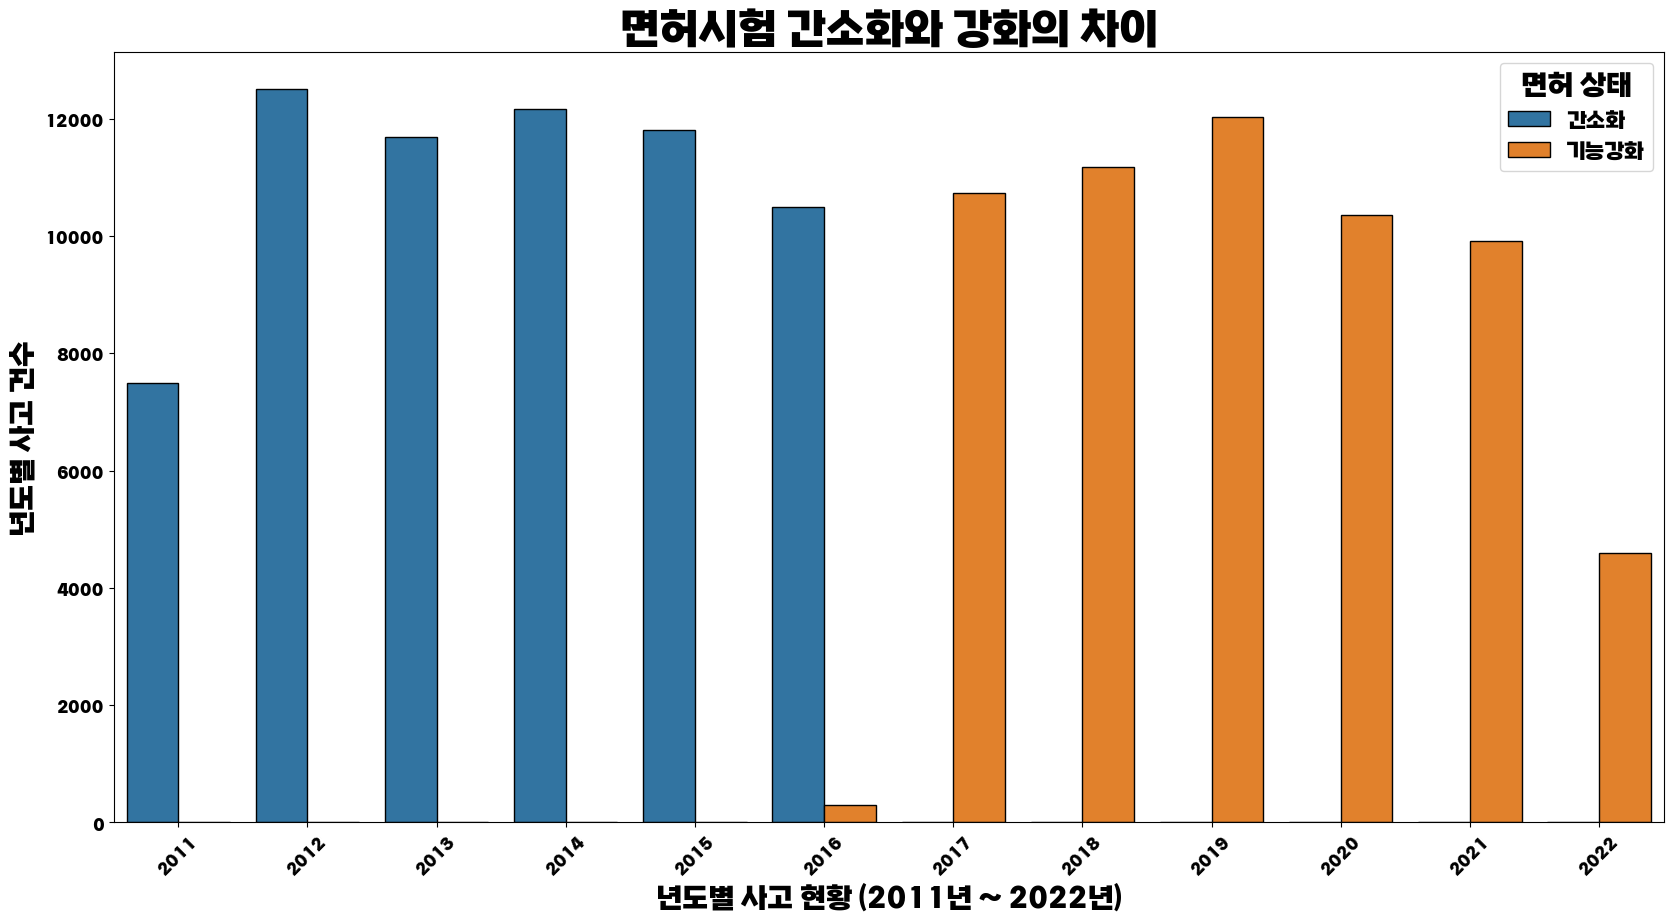

In [92]:
# 면허시험 간소화와 강화의 차이 시각화
# The visualization for the difference between the simplification and reinforcement of the driver's license test

final_df['사고일시_월'] = final_df['사고일시'].dt.to_period('A')
plt.figure(figsize=(20, 10))
sns.countplot(data=final_df, x='사고일시_월', hue='면허시험 상태',edgecolor = "black")
plt.xlabel('년도별 사고 현황 (2011년 ~ 2022년)', fontdict={'fontsize': 20})
plt.ylabel('년도별 사고 건수',fontdict={'fontsize': 20})
plt.title('면허시험 간소화와 강화의 차이', fontdict={'fontsize': 30})
plt.xticks(rotation=45)
plt.legend(title='면허 상태', fontsize=15, title_fontsize=20)
plt.show()


In [74]:
below_20 = group_data(trim_data(below_20))
below_20.index.name = "2011-2013 20세이하"
below_20_2 = group_data(trim_data(below_20_2))
below_20_2.index.name = "2016-2018 20세이하"

In [75]:
under_30 = group_data(trim_data(under_30))
under_30.index.name = "2011-2013 20세이상 30세미만"
under_30_2 = group_data(trim_data(under_30_2))
under_30_2.index.name = "2016-2018 20세이상 30세미만"

In [76]:
under_40 = group_data(trim_data(under_40))
under_40.index.name = "2011-2013 30세이상 40세미만"
under_40_2 = group_data(trim_data(under_40_2))
under_40_2.index.name = "2016-2018 30세이상 40세미만"

In [77]:
under_50 = group_data(trim_data(under_50))
under_50.index.name = "2011-2013 40세이상 50세미만 가해 현황"
under_50_2 = group_data(trim_data(under_50_2))
under_50_2.index.name = "2016-2018 40세이상 50세미만 가해 현황"

In [78]:
under_60 = group_data(trim_data(under_60))
under_60.index.name = "2011-2013 50세이상 60세미만"
under_60_2 = group_data(trim_data(under_60_2))
under_60_2.index.name = "2016-2018 50세이상 60세미만"

In [79]:
over_65 = group_data(trim_data(over_65))
over_65.index.name = "2011-2013 65세이상"
over_65_2 = group_data(trim_data(over_65_2))
over_65_2.index.name = "2016-2018 65세이상"

In [80]:
below_20_final = finalize(below_20, below_20_2)
under_30_final = finalize(under_30, under_30_2)
under_40_final = finalize(under_40, under_40_2)
under_50_final = finalize(under_50, under_50_2)
under_60_final = finalize(under_60, under_60_2)
over_65_final = finalize(over_65, over_65_2)

final =  pd.concat([below_20_final,
                    under_30_final,
                    under_40_final,
                    under_50_final,
                    under_60_final,
                    over_65_final], axis=1)

final.rename(columns={'2011-2013 20세이하 사고건수':"20_11-13",
                      '2016-2018 20세이하 사고건수':"20.2_16-18",
                      '2011-2013 20세이상 30세미만 사고건수':"30_11-13",
                      '2016-2018 20세이상 30세미만 사고건수':"30.2_16-18",
                      '2011-2013 30세이상 40세미만 사고건수':"40_11-13",
                      '2016-2018 30세이상 40세미만 사고건수':"40.2_16-18",
                      '2011-2013 40세이상 50세미만 가해 현황 사고건수':"50_11-13",
                      '2016-2018 40세이상 50세미만 가해 현황 사고건수':"50.2_16-18",
                      '2011-2013 50세이상 60세미만 사고건수':"60_11-13",
                      '2016-2018 50세이상 60세미만 사고건수':"60.2_16-18",
                      '2011-2013 65세이상 사고건수':"65_11-13",
                      '2016-2018 65세이상 사고건수':"65.2_16-18"}, inplace=True)
final

,20_11-13,20.2_16-18,30_11-13,30.2_16-18,40_11-13,40.2_16-18,50_11-13,50.2_16-18,60_11-13,60.2_16-18,65_11-13,65.2_16-18
1년 미만,859.0,521.0,257.0,257.0,220.0,97.0,230.0,98.0,119.0,77.0,27.0,18.0
2년 미만,366.0,264.0,231.0,231.0,233.0,100.0,243.0,90.0,157.0,102.0,23.0,20.0
3년 미만,196.0,159.0,345.0,345.0,198.0,113.0,259.0,94.0,130.0,90.0,27.0,23.0


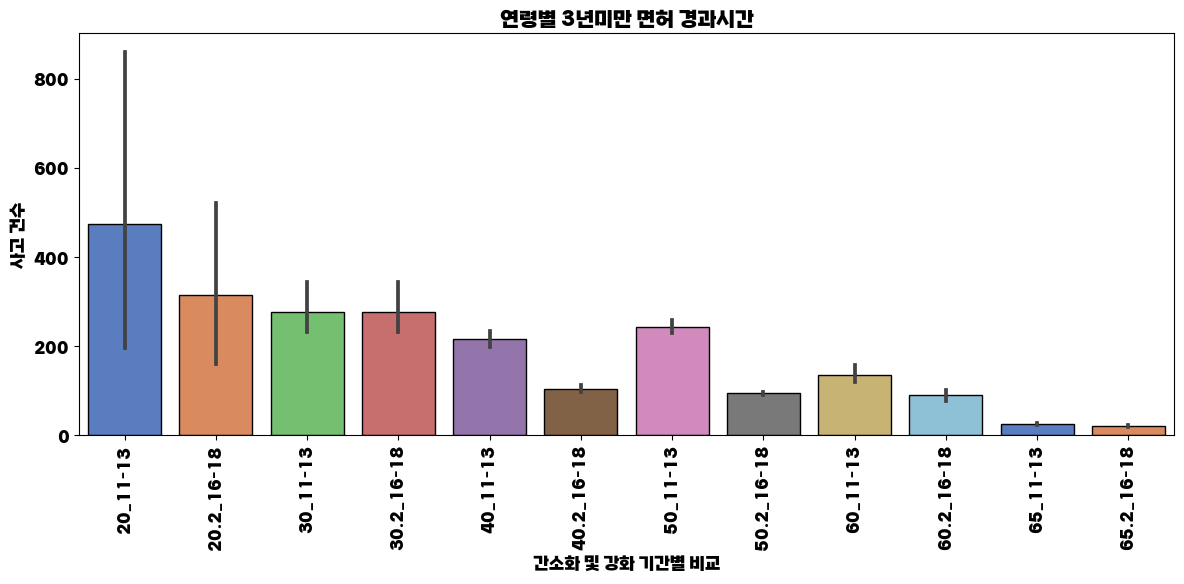

In [93]:
# 사고율에 대한 연령별 3년미만 면허 경과시간
# Elapsed time for the driver's license by age for the rate of accident

plt.figure(figsize=(12, 6))
sns.barplot(data=final, palette='muted',edgecolor = "black")

# Set plot title and labels
plt.title('연령별 3년미만 면허 경과시간')
plt.xlabel('간소화 및 강화 기간별 비교')
plt.ylabel('사고 건수')
plt.xticks(rotation = 90)
# Show the plot
plt.tight_layout()
plt.show()

In [82]:
df_lic_11_13 = lic_total(df_lic_11_13)
df_lic_14_16 = lic_total(df_lic_14_16)
df_lic_17_19 = lic_total(df_lic_17_19)
df_lic_20_22 = lic_total(df_lic_20_22)

In [83]:
df_lic_final = pd.concat([df_lic_11_13, df_lic_14_16, df_lic_17_19, df_lic_20_22], axis=1)

In [84]:
df_lic_final = df_lic_final.astype(int)

In [85]:
df_lic_final1 = df_lic_final.drop(index=['5년 미만', '10년 미만', '15년 미만', '15년 이상'])

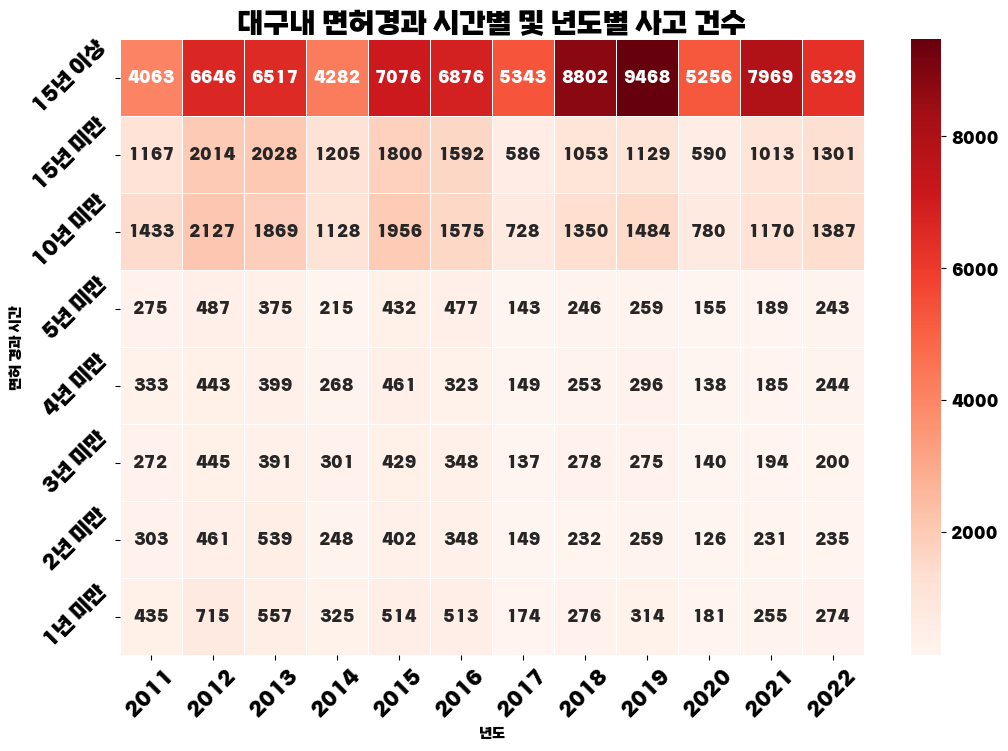

In [94]:
# 대구내 면허경과 시간별 및 년도별 사고 건수 (범위: 1년미만 ~ 15년 이상)
# The elapsed time for the driver's license in Daegu by time and accident rate (range: below year 1 to above year 15)

plt.figure(figsize=(12, 8))
sns.heatmap(df_lic_final, annot=True, fmt="d", cmap='Reds', linewidths=0.5)
plt.xlabel('년도',fontdict={'fontsize': 10})
plt.ylabel('면허 경과 시간',fontdict={'fontsize': 10})
plt.title('대구내 면허경과 시간별 및 년도별 사고 건수',fontdict={'fontsize': 20})
plt.yticks(size=15, rotation=45)
plt.xticks(rotation=45, size=15)
plt.show()

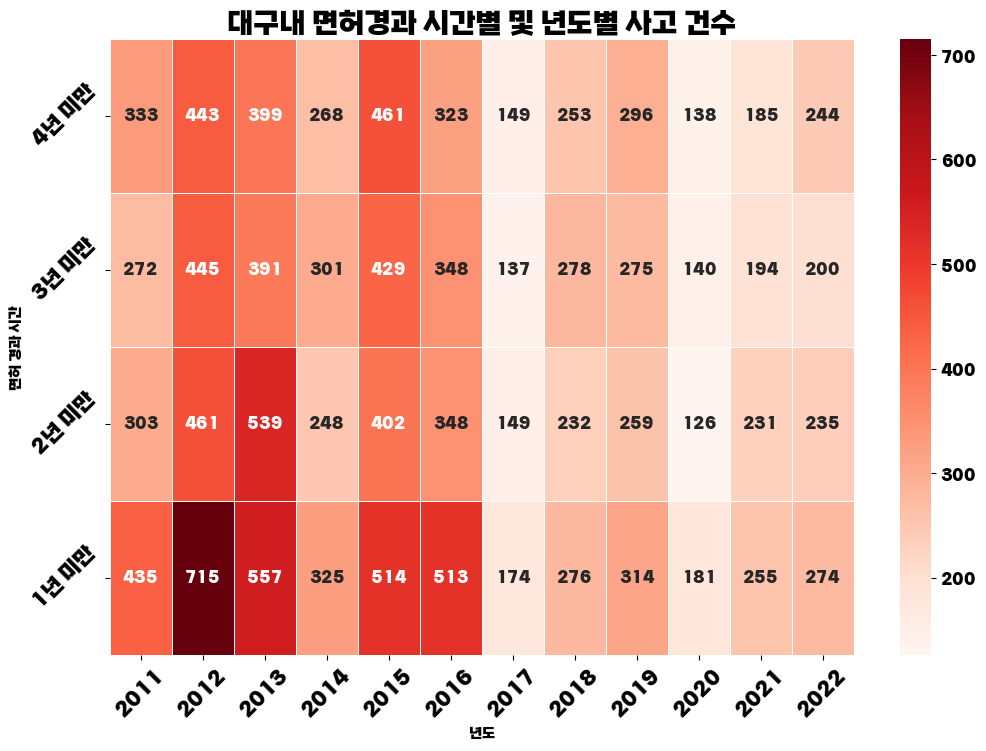

In [95]:
# 대구내 면허경과 시간별 및 년도별 사고 건수 (범위: 1년미만 ~ 4년 미만)
# The elapsed time for the driver's license in Daegu by time and accident rate (range: below year 1 to below year 4)

plt.figure(figsize=(12, 8))
sns.heatmap(df_lic_final1, annot=True, fmt="d", cmap='Reds', linewidths=0.5)
plt.xlabel('년도',fontdict={'fontsize': 10})
plt.ylabel('면허 경과 시간',fontdict={'fontsize': 10})
plt.title('대구내 면허경과 시간별 및 년도별 사고 건수',fontdict={'fontsize': 20})
plt.yticks(size=15, rotation=45)
plt.xticks(rotation=45, size=15)
plt.show()

In [88]:
df_lic_final2 = df_lic_final.drop(index=['4년 미만', 
                                         '5년 미만', 
                                         '10년 미만', 
                                         '15년 미만', 
                                         '15년 이상'])

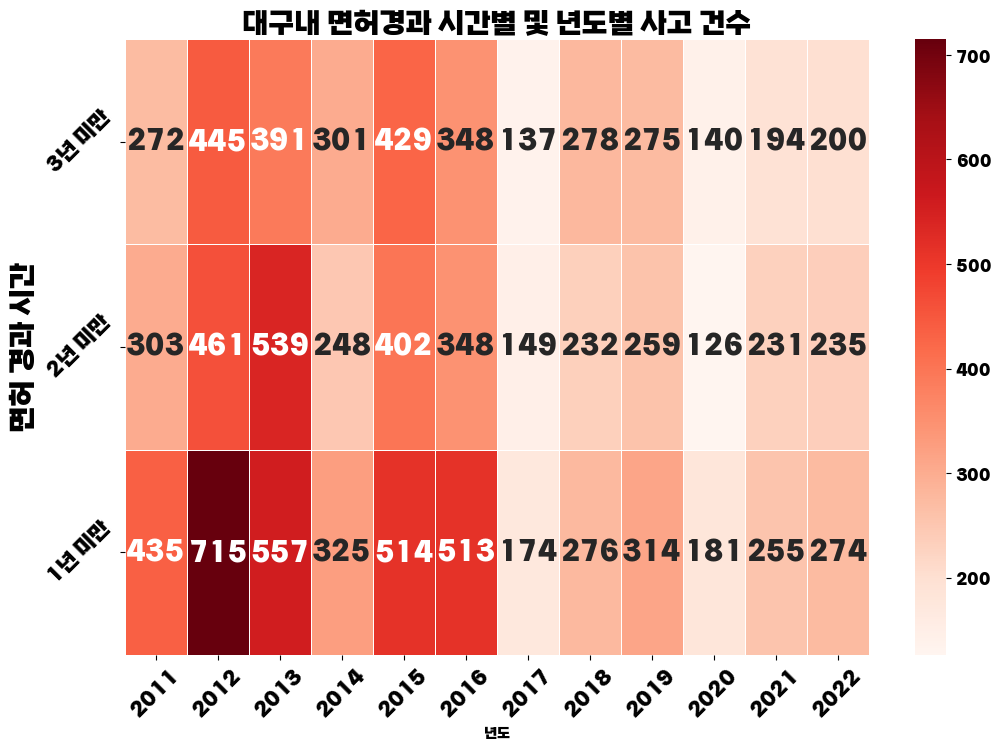

In [96]:
# 대구내 면허경과 시간별 및 년도별 사고 건수 (범위: 1년미만 ~ 3년미만)
# The elapsed time for the driver's license in Daegu by time and accident rate (range: below year 1 to below year 3)

plt.figure(figsize=(12, 8))
sns.heatmap(df_lic_final2, 
            annot=True, 
            fmt="d", 
            cmap='Reds', 
            linewidths=0.5,  
            annot_kws={'size':20})
plt.xlabel('년도',fontdict={'fontsize': 10})
plt.ylabel('면허 경과 시간',fontdict={'fontsize': 20})
plt.title('대구내 면허경과 시간별 및 년도별 사고 건수',fontdict={'fontsize': 20})
plt.yticks(size=15, rotation=45)
plt.xticks(rotation=45, size=15)
plt.show()